<a href="https://colab.research.google.com/github/markusloecher/DataScience2021/blob/main/TWSM/Class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regular Expressions

https://www.w3schools.com/python/python_regex.asp

In [ ]:
import re


txt = "In 2022, the March equinox happens on \nSunday, March 20, at 11:33 A.M. EDT. This marks the return of spring to the Northern Hemisphere.The word equinox comes from the Latin words for equal night—aequus (equal) and nox (night)."

print(re.findall("March", txt))
#The dot ( . ) represents any character.
print(re.findall("M...h", txt))
# We specify a range of characters by enclosing them within square brackets ( [ ] ).
print(re.findall("[Mm]ar[ck][hs]", txt))
# "or"
print(re.findall("March|Sunday", txt))
#find numbers:
print(re.findall("[0-9][0-9]", txt))
print(re.findall("[0-9]+", txt))
print(re.findall("[0-9][0-9]:[0-9][0-9]", txt))
#starts with 
print(re.findall("^S.*", txt))


['March', 'March']
['March', 'March']
['March', 'March', 'marks']
['March', 'Sunday', 'March']
['20', '22', '20', '11', '33']
['2022', '20', '11', '33']
['11:33']
[]


In [ ]:
txt = "Spring 2022 in Northern Hemisphere began on Sunday, 20 March and ends on Tuesday, 21 June."
txt.lower()

'spring 2022 in northern hemisphere began on sunday, 20 march and ends on tuesday, 21 june.'

In [ ]:
#^ Starts with
[print(re.findall("^S.*", s)) for s in txt.split()]

In [ ]:
#multiline mode
print(re.findall("(?m)^S.*", txt))


['Sunday, March 20, at 11:33 A.M. EDT. This marks the return of spring to the Northern Hemisphere.The word equinox comes from the Latin words for equal night—aequus (equal) and nox (night).']


In [ ]:
#txt.split()
re.split("\s",txt)

In [ ]:
#anything but
print(re.findall("[^S.*]", txt))
txt.lower()

['I', 'n', ' ', '2', '0', '2', '2', ',', ' ', 't', 'h', 'e', ' ', 'M', 'a', 'r', 'c', 'h', ' ', 'e', 'q', 'u', 'i', 'n', 'o', 'x', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 's', ' ', 'o', 'n', ' ', '\n', 'u', 'n', 'd', 'a', 'y', ',', ' ', 'M', 'a', 'r', 'c', 'h', ' ', '2', '0', ',', ' ', 'a', 't', ' ', '1', '1', ':', '3', '3', ' ', 'A', 'M', ' ', 'E', 'D', 'T', ' ', 'T', 'h', 'i', 's', ' ', 'm', 'a', 'r', 'k', 's', ' ', 't', 'h', 'e', ' ', 'r', 'e', 't', 'u', 'r', 'n', ' ', 'o', 'f', ' ', 's', 'p', 'r', 'i', 'n', 'g', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'N', 'o', 'r', 't', 'h', 'e', 'r', 'n', ' ', 'H', 'e', 'm', 'i', 's', 'p', 'h', 'e', 'r', 'e', 'T', 'h', 'e', ' ', 'w', 'o', 'r', 'd', ' ', 'e', 'q', 'u', 'i', 'n', 'o', 'x', ' ', 'c', 'o', 'm', 'e', 's', ' ', 'f', 'r', 'o', 'm', ' ', 't', 'h', 'e', ' ', 'L', 'a', 't', 'i', 'n', ' ', 'w', 'o', 'r', 'd', 's', ' ', 'f', 'o', 'r', ' ', 'e', 'q', 'u', 'a', 'l', ' ', 'n', 'i', 'g', 'h', 't', '—', 'a', 'e', 'q', 'u', 'u', 's', ' ', '(', 'e', 'q'

'in 2022, the march equinox happens on \nsunday, march 20, at 11:33 a.m. edt. this marks the return of spring to the northern hemisphere.the word equinox comes from the latin words for equal night—aequus (equal) and nox (night).'

# Text Analysis and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"
bing = pd.read_csv(TWSM_path+"bing.csv")

bing

,Unnamed: 0,word,sentiment
0,1,2-faces,negative
1,2,abnormal,negative
2,3,abolish,negative
3,4,abominable,negative
4,5,abominably,negative
...,...,...,...
6781,6782,zealously,negative
6782,6783,zenith,positive
6783,6784,zest,positive
6784,6785,zippy,positive


## Gutenberg

In [ ]:
!pip install gutenberg

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

In [ ]:
#text = strip_headers(load_etext(42671)).strip()
#text = load_etext(42671)
print(text)

In [ ]:
text.split()

### Tasks

1. Compute the term frequencies
2. Inspect the top 20
3. Verify Zipf's law
4. Think about useful text preprocessing
5. Repeat with your favorite book from Gutenberg

Extras
1. Find all dates menioned in the book
2. Count the number of positive and negative words using one of the sentiment dictionaries provided

In [ ]:
# function for transformation
def transform_df(text):
    
    (unique, counts) = np.unique(text.split(), return_counts=True)
    df_words = pd.DataFrame(unique, counts).reset_index().rename(columns = {"index":"counts", 0:"word"}).sort_values(by = "counts", ascending = False)
    df_words["rank"] =  df_words["counts"].rank(ascending=False)
    
    return df_words

df_words = transform_df(text)

df_words.head()

,counts,word,rank
11842,4062,the,1.0
12017,4045,to,2.0
8692,3579,of,3.0
2110,3282,and,4.0
1580,1874,a,5.0


In [ ]:
TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"
afinn = pd.read_csv(TWSM_path+"afinn.csv")

afinn

,Unnamed: 0,word,value
0,1,abandon,-2
1,2,abandoned,-2
2,3,abandons,-2
3,4,abducted,-2
4,5,abduction,-2
...,...,...,...
2472,2473,yucky,-2
2473,2474,yummy,3
2474,2475,zealot,-2
2475,2476,zealots,-2


In [ ]:
dic = afinn

sentiment_merge = pd.merge(dic, df_words, how="inner", on="word")
#sentiment_merge = pd.merge(dic, df_words, left_on="word", right_on="words")
sentiment_merge["total_value"] = sentiment_merge["value"] * sentiment_merge["counts"]
ovr_score = np.mean(sentiment_merge["total_value"])

print(ovr_score)

4.485677083333333


In [ ]:
import numpy as np

wrds, cts = np.unique(text.split(), return_counts=True)


In [ ]:
i = np.argsort(cts)
wrds[i[::-1]]

array(['the', 'to', 'of', ..., 'even?"', 'purchase.', 'youths'],
      dtype='<U70')

AttributeError: ignored

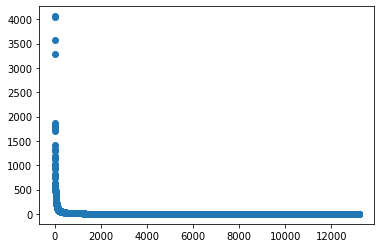

In [ ]:
plt.scatter(np.arange(len(i)),cts[i[::-1]])
#plt.set(yscale="log")
#plt.xscale("log")

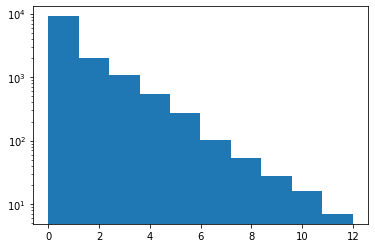

In [ ]:
import matplotlib.pyplot as plt
plt.hist(np.log2(cts), log=True);

Take a look at the following useful gensim functions 

* strip_tags
* strip_numeric
* strip_punctuation 
* strip_multiple_whitespaces 
* remove_stopwords
* strip_short
* stem_text

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text

In [ ]:
STOPWORDS

#textNoStop = remove_stopwords(text)
wrds, cts = np.unique(textNoStop.split(), return_counts=True)
i = np.argsort(cts)
wrds[i[::-1]]
(len(text.split())-len(textNoStop.split()))/len(text.split())
print(len(text.split()))

121961


In [ ]:
textShort = strip_numeric(textNoStop); print(len(textShort.split()))
textShort = strip_punctuation(textShort); print(len(textShort.split()))
textShort = strip_multiple_whitespaces(textShort); print(len(textShort.split()))
textShort = strip_short(textShort); print(len(textShort.split()))

#(len(text.split())-len(textNoStop.split()))/len(text.split())

57099
58647
58647
52387


In [ ]:
#open question: why does punctuation remocal expand token list ?
np.setdiff1d(textShort2.split(), textShort1.split())

array(['Accordingly', 'Against', 'Ah', ..., 'www', 'yes', 'zip'],
      dtype='<U24')

In [ ]:
def tf(text):
  wrds, cts = np.unique(text.split(), return_counts=True)
  i = np.argsort(cts)
  df = pd.DataFrame(wrds[i[::-1]], cts[i[::-1]])#.transpose()
  #df.transpose
  #df.rename(["words", "counts"])
  
  return df

tf(textShort).head(10)
#textNoStopNoNow = re.sub("Now,", "Now", textNoStop)
#re.findall("Now.", textNoStopNoNow)

,0
634,Elizabeth
417,Darcy
402,said
342,Mrs
324,She
323,Bennet
320,But
311,her
306,Bingley
292,Jane


## IMD Movie Reviews


***Loading the IMDB dataset***

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
N=len(train_data)
decoded_reviews = ["" for x in range(N)]

for j in range(N):
  decoded_reviews[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[j]])

In [ ]:
re.findall("robert", decoded_review)

['robert']

## 20-Newsgroups 

In this exercise, we will be using the 20-Newsgroups dataset. This version of the dataset contains about 11k newsgroups posts from 20 different topics.

In [ ]:
# Import packages
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# 1. Import and examine data

In [ ]:
# Import dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [ ]:
# Examine dataset
print('Possible tagret values:')
print(df.target_names.unique())
print(' ')
print('Class distribution:')
print(df.target_names.value_counts())

Possible tagret values:
['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']
 
Class distribution:
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 48

*The classes are almost uniformly distributed.*

In [ ]:
print(df.content[0])
df.content[0]

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
re.findall('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:|\s*-+)', df.content[0])

['From:', 'Nntp-Posting-Host:', 'Organization:', 'Lines:']

In [ ]:
re.search('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:)', df.content[0])

<re.Match object; span=(0, 5), match='From:'>

In [ ]:
re.sub('(?m)^(From:|Article-I.D.:|Organization:|Lines:|Nntp-Posting-Host:|Distribution:|Reply-To:|X-Newsreader:|Expires:|\s*-+).*\n', '', df.content[0], flags=re.I)

'Subject: WHAT car is this!?\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n\n\n\n\n'